In [1]:
#1استيراد الملف الجديد اسمه بيانات بيع 
import pandas as pd

file_name = "بيانات بيع.csv"

df = pd.read_csv(file_name, sep=';')
display(df.head())


,Date,Product,Category,Quantity,Price,Total_Sales,Month
0,01/01/2024,Laptop,Gadgets,2,1000,2000,April
1,13/04/2024,Monitor,Electronics,2,300,600,June
2,14/04/2024,Laptop,Accessories,5,1000,5000,April
3,15/04/2024,Laptop,Accessories,5,1000,5000,January
4,16/04/2024,Phone,Accessories,6,700,4200,April


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         200 non-null    object
 1   Product      200 non-null    object
 2   Category     200 non-null    object
 3   Quantity     200 non-null    int64 
 4   Price        200 non-null    int64 
 5   Total_Sales  200 non-null    int64 
 6   Month        200 non-null    object
dtypes: int64(3), object(4)
memory usage: 11.1+ KB
None


In [3]:
df["Date"] = pd.to_datetime(df["Date"],dayfirst=True, errors="coerce") 

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         200 non-null    datetime64[ns]
 1   Product      200 non-null    object        
 2   Category     200 non-null    object        
 3   Quantity     200 non-null    int64         
 4   Price        200 non-null    int64         
 5   Total_Sales  200 non-null    int64         
 6   Month        200 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 11.1+ KB
None


In [5]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.replace(r'\s+', ' ', regex=True).str.strip()
print(df.head())


        Date  Product     Category  Quantity  Price  Total_Sales    Month
0 2024-01-01   Laptop      Gadgets         2   1000         2000    April
1 2024-04-13  Monitor  Electronics         2    300          600     June
2 2024-04-14   Laptop  Accessories         5   1000         5000    April
3 2024-04-15   Laptop  Accessories         5   1000         5000  January
4 2024-04-16    Phone  Accessories         6    700         4200    April


In [8]:

product_quantity = df.groupby("Product")["Quantity"].sum().reset_index()
print(product_quantity)


      Product  Quantity
0  Headphones       127
1      Laptop       220
2     Monitor       262
3       Phone       176
4      Tablet       160


In [9]:

category_quantity = df.groupby("Category")["Quantity"].sum().reset_index()
print(category_quantity)


      Category  Quantity
0  Accessories       310
1  Electronics       386
2      Gadgets       249


In [11]:
product_total = df.groupby("Product")["Total_Sales"].sum().reset_index()
print(product_total)


      Product  Total_Sales
0  Headphones        12700
1      Laptop       220000
2     Monitor        78600
3       Phone       123200
4      Tablet        80000


In [12]:
category_total = df.groupby("Category")["Total_Sales"].sum().reset_index()
print(category_total)

      Category  Total_Sales
0  Accessories       173200
1  Electronics       213200
2      Gadgets       128100


In [23]:
phone_sales = df[df["Product"] == "Phone"]
display(phone_sales.head())


,Date,Product,Category,Quantity,Price,Total_Sales,Month
4,2024-04-16,Phone,Accessories,6,700,4200,April
7,2024-04-19,Phone,Gadgets,1,700,700,January
15,2024-04-27,Phone,Accessories,6,700,4200,May
16,2024-04-28,Phone,Gadgets,3,700,2100,May
22,2024-05-04,Phone,Accessories,2,700,1400,February


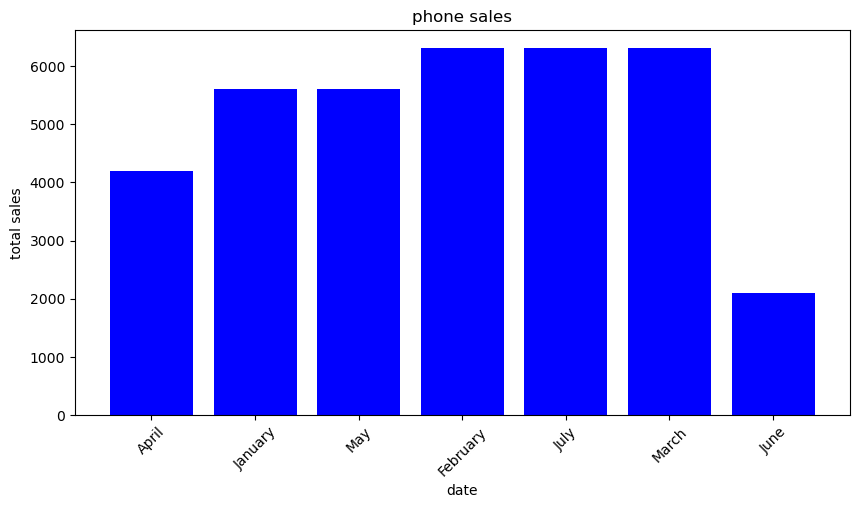

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(phone_sales["Month"], phone_sales["Total_Sales"], color="blue")
plt.title("phone sales")
plt.xlabel("date")
plt.ylabel("total sales")
plt.xticks(rotation=45)
plt.show()


In [26]:
labtop_sales = df[df["Product"] == "Laptop"]
print(labtop_sales.head())

         Date Product     Category  Quantity  Price  Total_Sales    Month
0  2024-01-01  Laptop      Gadgets         2   1000         2000    April
2  2024-04-14  Laptop  Accessories         5   1000         5000    April
3  2024-04-15  Laptop  Accessories         5   1000         5000  January
9  2024-04-21  Laptop  Accessories         4   1000         4000      May
11 2024-04-23  Laptop  Accessories         7   1000         7000    March


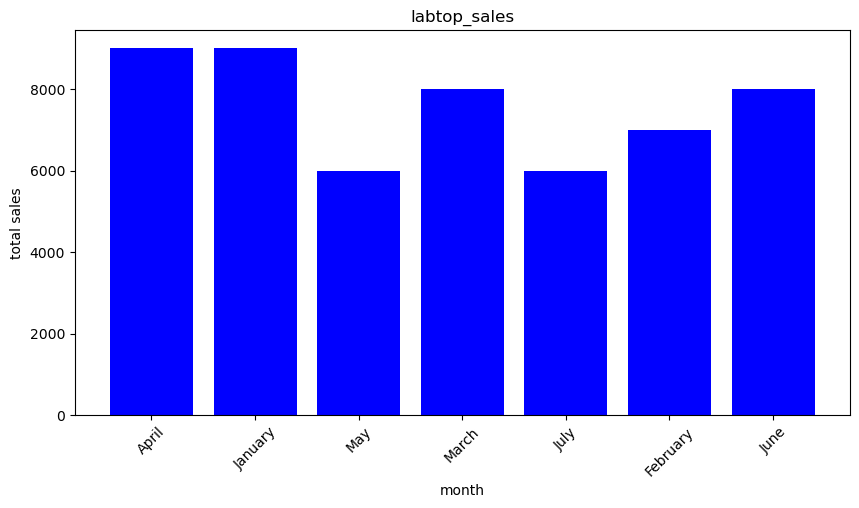

In [27]:
plt.figure(figsize=(10, 5))
plt.bar(labtop_sales["Month"],labtop_sales["Total_Sales"], color="blue")
plt.title("labtop_sales")
plt.xlabel("month")
plt.ylabel("total sales")
plt.xticks(rotation=45)
plt.show()


In [28]:
tablet_sales = df[df["Product"] == "Tablet"]
print(tablet_sales.head())

         Date Product     Category  Quantity  Price  Total_Sales     Month
8  2024-04-20  Tablet      Gadgets         6    500         3000     April
13 2024-04-25  Tablet  Accessories         4    500         2000     April
21 2024-05-03  Tablet  Accessories         3    500         1500      June
27 2024-05-09  Tablet  Accessories         1    500          500      June
28 2024-05-10  Tablet  Electronics         3    500         1500  February


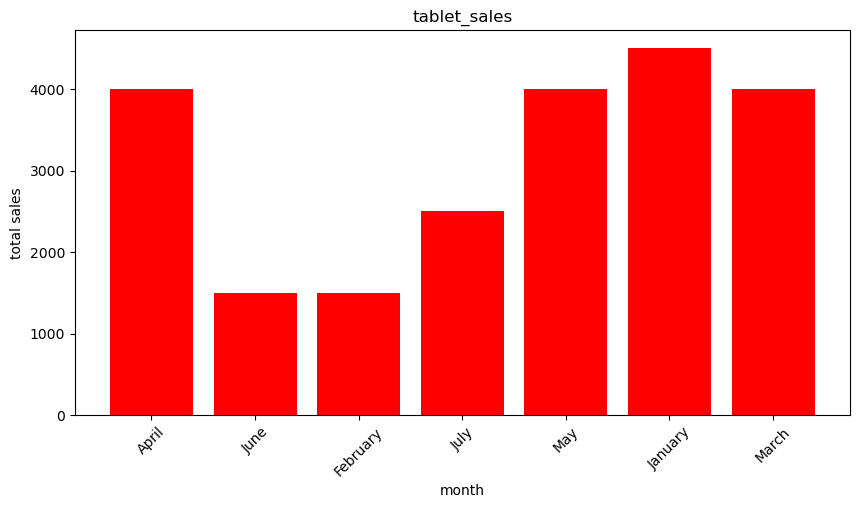

In [29]:
plt.figure(figsize=(10, 5))
plt.bar(tablet_sales["Month"],tablet_sales["Total_Sales"], color="red")
plt.title("tablet_sales")
plt.xlabel("month")
plt.ylabel("total sales")
plt.xticks(rotation=45)
plt.show()

In [30]:

high_sales = df[df["Total_Sales"] > 2000]
print(high_sales.head())


        Date  Product     Category  Quantity  Price  Total_Sales    Month
2 2024-04-14   Laptop  Accessories         5   1000         5000    April
3 2024-04-15   Laptop  Accessories         5   1000         5000  January
4 2024-04-16    Phone  Accessories         6    700         4200    April
6 2024-04-18  Monitor  Electronics         8    300         2400     July
8 2024-04-20   Tablet      Gadgets         6    500         3000    April


In [32]:
low_sales = df[df["Total_Sales"] <2000]
print(low_sales.head())

         Date     Product     Category  Quantity  Price  Total_Sales    Month
1  2024-04-13     Monitor  Electronics         2    300          600     June
5  2024-04-17     Monitor      Gadgets         3    300          900    March
7  2024-04-19       Phone      Gadgets         1    700          700  January
10 2024-04-22  Headphones      Gadgets         1    100          100    March
17 2024-04-29     Monitor      Gadgets         6    300         1800      May


In [33]:

product_sales = df.groupby("Product")["Total_Sales"].sum().reset_index()
print(product_sales)

      Product  Total_Sales
0  Headphones        12700
1      Laptop       220000
2     Monitor        78600
3       Phone       123200
4      Tablet        80000


In [34]:

top_products = product_sales.sort_values(by="Total_Sales", ascending=False)
print(top_products)

      Product  Total_Sales
1      Laptop       220000
3       Phone       123200
4      Tablet        80000
2     Monitor        78600
0  Headphones        12700


In [36]:
top_3_products = top_products.head(3)
print(top_3_products)

  Product  Total_Sales
1  Laptop       220000
3   Phone       123200
4  Tablet        80000


In [37]:
next_3_products = top_products.iloc[3:6]
print(next_3_products)

      Product  Total_Sales
2     Monitor        78600
0  Headphones        12700


In [38]:
third_3_products = top_products.iloc[6:9]
print(third_3_products )

Empty DataFrame
Columns: [Product, Total_Sales]
Index: []


In [39]:
product_quantity= df.groupby("Product")["Quantity"].sum().reset_index()
print(product_quantity)

      Product  Quantity
0  Headphones       127
1      Laptop       220
2     Monitor       262
3       Phone       176
4      Tablet       160


In [40]:
top_product= product_quantity.sort_values(by="Quantity", ascending=False)
print(top_product)

      Product  Quantity
2     Monitor       262
1      Laptop       220
3       Phone       176
4      Tablet       160
0  Headphones       127


In [42]:
top_3_products=top_product.head(3)
print(top_3_products)

   Product  Quantity
2  Monitor       262
1   Laptop       220
3    Phone       176


In [43]:
next_3_products=top_product.iloc[3:6]
print(next_3_products)

      Product  Quantity
4      Tablet       160
0  Headphones       127


In [44]:
product_quantity = df.groupby("Product")["Quantity"].sum().reset_index()
print(product_quantity)

      Product  Quantity
0  Headphones       127
1      Laptop       220
2     Monitor       262
3       Phone       176
4      Tablet       160


In [45]:
top_product=product_quantity.sort_values(by="Quantity", ascending=False)
print(top_product)

      Product  Quantity
2     Monitor       262
1      Laptop       220
3       Phone       176
4      Tablet       160
0  Headphones       127


In [47]:
top_2_prodcut=top_product.head(2)
print(top_2_prodcut)

   Product  Quantity
2  Monitor       262
1   Laptop       220


In [53]:
nex_2_product=top_product.iloc[2:4]
print(nex_2_product)

  Product  Quantity
3   Phone       176
4  Tablet       160


In [54]:
q1 = df["Total_Sales"].quantile(0.25)
q3= df["Total_Sales"].quantile(0.75)

In [56]:
bottom_quartile=df[df["Total_Sales"]<=q1]
print(bottom_quartile)

          Date     Product     Category  Quantity  Price  Total_Sales  \
1   2024-04-13     Monitor  Electronics         2    300          600   
5   2024-04-17     Monitor      Gadgets         3    300          900   
7   2024-04-19       Phone      Gadgets         1    700          700   
10  2024-04-22  Headphones      Gadgets         1    100          100   
18  2024-04-30  Headphones  Electronics         7    100          700   
23  2024-05-05  Headphones  Electronics         4    100          400   
27  2024-05-09      Tablet  Accessories         1    500          500   
30  2024-05-12  Headphones  Electronics         1    100          100   
33  2024-05-15      Tablet      Gadgets         1    500          500   
38  2024-05-20  Headphones      Gadgets         6    100          600   
43  2024-05-25     Monitor  Accessories         3    300          900   
48  2024-05-30     Monitor      Gadgets         1    300          300   
49  2024-05-31     Monitor  Electronics         1  

In [57]:
top_quartile=df[df["Total_Sales"]>q3]
print(top_quartile)

          Date Product     Category  Quantity  Price  Total_Sales     Month
2   2024-04-14  Laptop  Accessories         5   1000         5000     April
3   2024-04-15  Laptop  Accessories         5   1000         5000   January
4   2024-04-16   Phone  Accessories         6    700         4200     April
9   2024-04-21  Laptop  Accessories         4   1000         4000       May
11  2024-04-23  Laptop  Accessories         7   1000         7000     March
12  2024-04-24  Laptop  Electronics         9   1000         9000     April
14  2024-04-26  Laptop  Electronics         4   1000         4000     April
15  2024-04-27   Phone  Accessories         6    700         4200       May
20  2024-05-02  Laptop  Electronics         7   1000         7000     March
25  2024-05-07   Phone  Accessories         9    700         6300      July
29  2024-05-11  Laptop  Electronics         9   1000         9000   January
32  2024-05-14   Phone  Electronics         8    700         5600  February
34  2024-05-

In [58]:
import sys
!{sys.executable} -m pip install arabic-reshaper python-bidi



   ---------------------------------------- 2/2 [arabic-reshaper]



<Axes: ylabel='Product'>

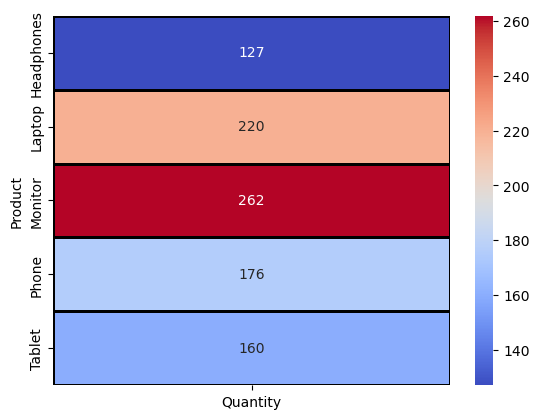

In [59]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
df['Product'] = df['Product'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))
# إنشاء جدول حراري باستخدام heatmap
sns.heatmap(df.pivot_table(index="Product", values="Quantity", aggfunc="sum"), 
 annot=True, fmt=".0f", cmap="coolwarm", linewidths=1, linecolor="black")


In [60]:
sales_summary = df.groupby("Product")["Total_Sales"].sum().reset_index()
print(sales_summary )

      Product  Total_Sales
0  Headphones        12700
1      Laptop       220000
2     Monitor        78600
3       Phone       123200
4      Tablet        80000


In [61]:
Q1 = sales_summary["Total_Sales"].quantile(0.25)

      Product  Total_Sales
0  Headphones        12700
2     Monitor        78600


In [63]:
Q3 = sales_summary["Total_Sales"].quantile(0.75)

In [66]:
Quantity
print(high_sales_products)

  Product  Total_Sales
1  Laptop       220000
3   Phone       123200


In [68]:
quantity_summary = df.groupby("Product")["Quantity"].sum().reset_index()
Q1 =quantity_summary["Quantity"].quantile(0.25)
Q3 =quantity_summary["Quantity"].quantile(0.75)
low_quantity_products =quantity_summary[quantity_summary["Quantity"] <= Q1]
print(low_quantity_products)


      Product  Quantity
0  Headphones       127
4      Tablet       160
